<img src="attachment" width="350" style="margin-left:auto; margin-right:auto" />
<h1><center>Project: Predicting Insurance Costs</center></h1>

In this project, we utilize linear regression to predict insurance costs. Linear regression is a fundamental statistical model that establishes a linear relationship between a dependent variable and one or more independent variables. The objective of this project is to develop a model that accurately predicts insurance costs based on demographic characteristics and other relevant factors.

#### Project Goals
- Explore the dataset and its features
- Prepare the data for modeling
- Apply and evaluate a linear regression model
- Analyze the model's performance and interpret the results

#### Dataset
The dataset includes various features such as age, gender, body mass index (BMI), number of children, smoking status, and region of residence, which are used to predict insurance costs. A short description for the features is as follows:

- `age`: Age of primary beneficiary
- `sex`: Insurance contractor gender, female, male
- `bmi`: An individual's body mass index, which is a measure of body fat based on height and weight, ideally ranging between 18.5 to 24.9.
- `children`: Number of children covered by health insurance / Number of dependents
- `smoker`: Smoker or non-smoker
- `region`: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- `charges`: The individual medical costs billed by health insurance.

*This project was completed as part of the Data Science Career Path offered by dataquest.io.*

In [1]:
# Import relevant packages
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set visualization parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [2]:
# load the dataset
insurance = pd.read_csv('insurance.csv')

In [3]:
# Display dataset information
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains 1338 rows and 9 columns. 3 columns are float value, 2 integer, 3 object and 1 boolean.

In [4]:
# Display the first few rows of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Create Logarithm of target variable for comparison in histogram plot
insurance['log_charges'] = np.log2(insurance['charges'])

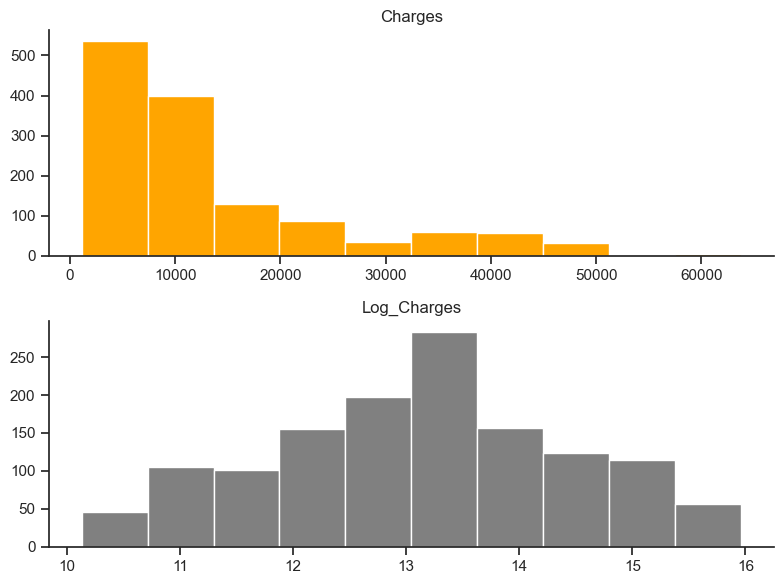

In [6]:
# Set figure and axis
fig, axs = plt.subplots(2, figsize=(8,6)) 

# Create histograms
axs[0].hist(insurance['charges'], color='orange')
axs[0].set_title('Charges')
axs[1].hist(insurance['log_charges'], color='grey')
axs[1].set_title('Log_Charges')

# Set tight_layout
fig.tight_layout()
plt.show()

In [7]:
# Calculate the correlation for numeric values in insurance
insurance.corr(numeric_only=True)

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


As we can see in the correlation plot, `age` has a low positive correlation value of 0.3 with charges, `bmi` has a low positive correlation of 0.2, and number of children has a very weak positive correlation of 0.07.

#### Potential Predictors

Due to the correlation plot we chose the continuous variable `age` as possible predictor for our model. On top of that, we'll also look at `smoker`, `sex` and `region`.

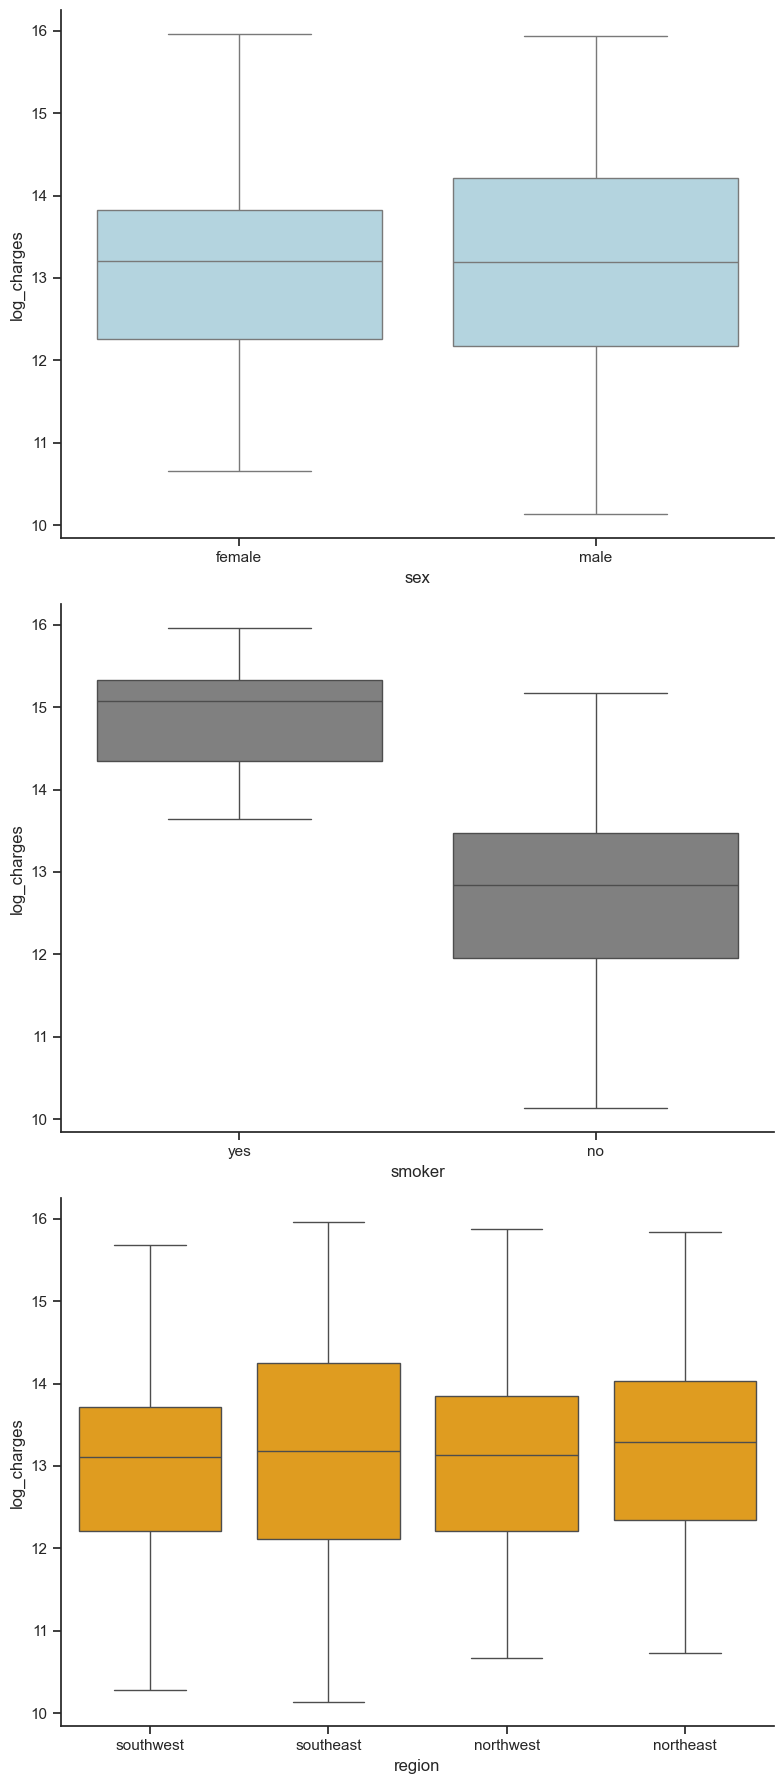

In [8]:
# Set figure and axis
fig, axs = plt.subplots(3, figsize=(8,18)) 

# Create boxplots
sns.boxplot(x='sex', y='log_charges', data=insurance , ax=axs[0], color='lightblue')
sns.boxplot(x='smoker', y='log_charges', data=insurance , ax=axs[1], color='grey')
sns.boxplot(x='region', y='log_charges', data=insurance , ax=axs[2], color='orange')

# Set tight_layout
fig.tight_layout()
plt.show()

Males seem to have a wider distribution of charges compared to women. Smokers have much higher costs than non-smokers. There doesn't seem to be many appreciable differences between regions.


#### Dividing The Data
Based on the univariate analyses conducted earlier, `age`, `bmi` and `smoker` are positively associated with higher `charges`. These predictors will be included in our final model.


In [9]:
# Setup predictors and target variable
insurance['smoking'] = (insurance['smoker'] == 'yes') # Use only smoking people
X = insurance[['age', 'bmi', 'smoking']] # Save predictors to X
y = insurance['log_charges'] # Save target variable to y

In [10]:
# Split in train and test data, set 25% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Build The Model

Now that we've divided up the data into both a training and test set, we're ready to build our predictive linear model.
Consider the following questions:

- Do the coefficient values align with the expected relationships with the target variable?
- What insights does the R² score provide regarding the model's fit?
- How well does the model predict the medical costs in the training set?


In [11]:
# Setup linear regression model
insurance_model = LinearRegression()

# Fit the model to train data
insurance_model.fit(X_train, y_train)

# Save coefficients, y_prediction values, intercept, r2_score, training mean squared error
coefficients = insurance_model.coef_ # The estimated betas for every predictor
y_predictions = insurance_model.predict(X_train)
intercept = insurance_model.intercept_ # The intercept shows the value for y if all X are zero
r2_score = r2_score(y_train, y_predictions) # The R² score indicates the proportion of variance explained by the model.
train_mse = mean_squared_error(y_train, y_predictions)

In [12]:
# R2 Score Value
r2_score

0.743333600772825

In [13]:
# Training mean squared error
train_mse

0.447919196329921

In [14]:
# Transform mean squared error back to regular value (log --> exp)
regular_train_mse = np.exp(train_mse)
regular_train_mse

1.565052228580154

#### Interim ConclusionThe training MSE for the model is approximately 0.454 in log-scale and 1.57 when transformed back to the original scale.. Te R2 scoreh indicates that the model can explain 74% of the variation in the log-insurance charges.These preliminary results are promising; however, it is important to recognize that these values may be optimistic due to the nature of the training data.

#### Residual Diagnostics

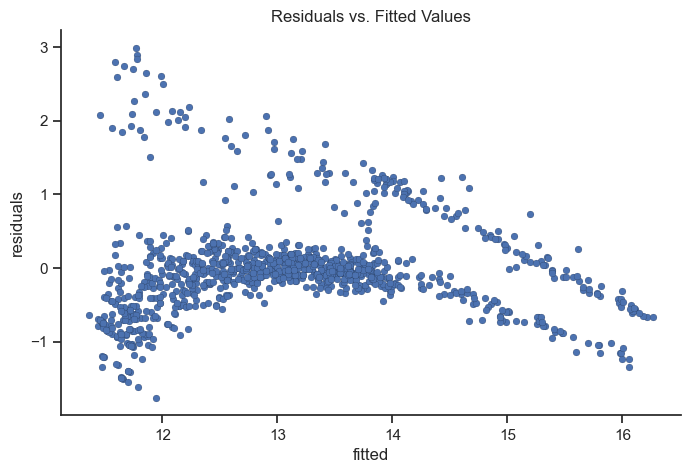

In [47]:
# Create residual dataframe
residuals = pd.DataFrame()
residuals['residuals'] = y_train - y_predictions
residuals['fitted'] = y_predictions

# Plot the residual data
plt.figure(figsize=(8,5))
plt.scatter(residuals['fitted'], residuals['residuals'], s=25, edgecolors='black', linewidths=0.1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('fitted')
plt.ylabel('residuals')

plt.show()

The residual plot indicates a potential violation of the linear regression assumptions, particularly heteroscedasticity, where the spread of residuals increases as the fitted values increase. This suggests that the model may not fully capture the variability in the data, particularly at higher values of the target variable. We expect an even band, centered around zero. This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions. 

#### Model Interpretation

In [16]:
# Show the coefficient values for age, bmi and smoking
coefficients

array([0.0508618 , 0.01563733, 2.23214787])

In [17]:
# Show the intercept value
intercept

10.199942936238685

- If the `age` raises by one (and holding all other predictors constant) we can see and average increase in `log_charges` by 0.05 and which corresponds to approximately a 5% increase in the regular `charges`.
- If the `bmi` predictor will be raised by one unit (holding all other predictors constant) we can see a 0.02 increase in `log_charges` (1.5% on regular scale)
- if a person is a `smoker` the value for `log_charges` raises by 2.23 (holding all other predictors constant). This translates to a 930% increase in the regular `charges`.
- If all coefficients are zero, the base value for `log_charges` would be 10.2. These value is in this respect unrealistic, since there is no person with and `age` and an `bmi` of 0.

*Note: we are interested in the linear model as a predictive model, not as an inferential model. So, we will have no way of knowing if the relationship is statistically significant*.*

#### Model Evaluation

In [18]:
# Save y_test_prediction values and test mean squared error
y_test_predictions = insurance_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_predictions)

# Transform test mse to regular value
regular_test_mse = np.exp(test_mse)

In [19]:
# Print train and test mse
print(train_mse, test_mse)

0.447919196329921 0.4529281560931768


In [20]:
# Print regular train and test mse
print(regular_train_mse, regular_test_mse)

1.565052228580154 1.5729111783706105


#### Conclusion

The test MSE is approximately 0.435, while the training MSE was about 0.454. In this case, the two errors match up pretty well, so we can conclude that the model is not overfit. The residuals suggest that the model predicts significantly lower costs than those actually incurred by some subjects. Therefore the model struggles with these higher costs. As a whole, the model predictions are overly conservative.
Next steps would include t improment of e the model by including more complex terms in the regression, such as interactions or quadratic terms.